In [122]:
import pandas as pd
import numpy as np

问题1.1：分析这些玻璃文物表面风化与纹饰、类型、颜色的关系；

In [123]:
data=pd.read_excel('附件.xlsx',sheet_name='表单1')
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [124]:
data.columns

Index(['文物编号', '纹饰', '类型', '颜色', '表面风化'], dtype='object')

In [125]:
data.describe()

,文物编号
count,58.000000
mean,29.500000
std,16.886879
min,1.000000
25%,15.250000
50%,29.500000
75%,43.750000
max,58.000000


我们可以看到共有58个文物

In [126]:
data.isnull().sum()

文物编号    0
纹饰      0
类型      0
颜色      4
表面风化    0
dtype: int64

我们注意我们有空值，填充空值,并输出为1.1.xlsx

In [127]:
data.dropna().to_excel('1.1.xlsx',index=None)

现在我的想法是对于这几个指标进行相关性分析和差异性分析
首先尝试一下差异性分析

算法：卡方检验分析
变量：变量Y:{表面风化}；变量X:{类型，颜色，纹饰}
首先我们先对其中的数据进行数值化

In [128]:
data = pd.read_excel("1.1.xlsx")
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [129]:
## labelencoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
data["纹饰"] = LabelEncoder().fit_transform(np.array(data["纹饰"])).reshape(-1,1)
data["表面风化"] = LabelEncoder().fit_transform(np.array(data["表面风化"])).reshape(-1,1)
data["类型"] = LabelEncoder().fit_transform(np.array(data["类型"])).reshape(-1,1)
data["颜色"] = LabelEncoder().fit_transform(np.array(data["颜色"])).reshape(-1,1)
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,2,1,6,0
1,2,0,0,1,1
2,3,0,1,6,0
3,4,0,1,6,0
4,5,0,1,6,0


但是如果这样的话，对于高钾和铅钡，不能一概地用0，1去表示，所以我们尝试对于表格的数据进行0，1化，得到1.2.xlsx

In [130]:
data = pd.read_excel("1.2.xlsx")
data.head()

,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_无风化,表面风化_风化,氧化钠(Na2O)
0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0.0
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.0
2,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0
3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0


首先对于纹饰进行卡方分析

In [131]:
data1= data[["纹饰_A","纹饰_B","纹饰_C","表面风化_风化","表面风化_无风化"]]
data1.head()

,纹饰_A,纹饰_B,纹饰_C,表面风化_风化,表面风化_无风化
0,0,0,1,0,1
1,1,0,0,1,0
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1


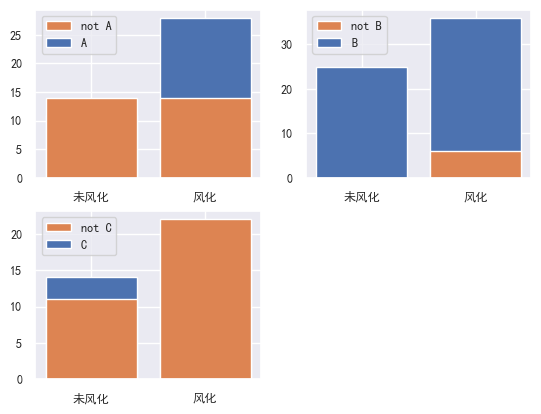

In [132]:
## 探索性绘图
import matplotlib.pyplot as plt
import seaborn as sns
a_table = pd.crosstab(data["纹饰_A"],data["表面风化_风化"],margins=True)
b_table = pd.crosstab(data["纹饰_B"],data["表面风化_风化"],margins=True)
c_table = pd.crosstab(data["纹饰_C"],data["表面风化_风化"],margins=True)
list1 = [a_table,b_table,c_table]

# 创建图像窗口
plt.figure()
# 创建子图
j=1
list2 = ["not A","A","not B","B","not C","C"]
for i in list1:
    plt.subplot(2,2,j)
    sns.set(font_scale=0.8)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

    categories = ["未风化","风化"]
    count_n = i.iloc[0][0:2].values
    count_y = i.iloc[1][0:2].values
    p1 = plt.bar(categories,count_n)
    p2 = plt.bar(categories,count_y)
    plt.legend((p2[0],p1[0]),(list2[2*j-2],list2[2*j-1]))
    j+=1
# 展示图片  
plt.show()
# data["纹饰_A"].value_counts()
# categories = ["风化","未风化"]
# len(data1[(data1["纹饰_A"]==1)&(data1["表面风化_风化"])])


我们尝试写一下卡方检验，使用scipy进行，其中返回值chi2检验统计量，p-value,dof自由度，expected预期频率

In [133]:
from scipy import stats
j=1
for ob in list1:
    f_ob = np.array([ob.iloc[0][0:2].values,ob.iloc[1][0:2].values])
    print(list2[2*j-1],"p值",stats.chi2_contingency(f_ob))
    j+=1


A p值 (2.443709009244722, 0.11799692869246177, 1, array([[14.55223881, 24.44776119],
       [10.44776119, 17.55223881]]))
B p值 (2.3662262555295337, 0.12398645179156087, 1, array([[22.76119403, 38.23880597],
       [ 2.23880597,  3.76119403]]))
C p值 (0.16892178083354534, 0.6810718381630008, 1, array([[12.68656716, 21.31343284],
       [12.31343284, 20.68656716]]))


重复上述过程对于颜色，类型进行检验

In [134]:
data2 = data[["类型_高钾","表面风化_风化"]]
data2.head()

,类型_高钾,表面风化_风化
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


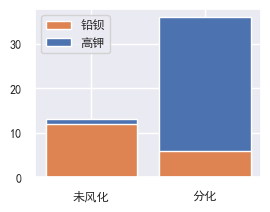

In [135]:
a_table = pd.crosstab(data["类型_高钾"],data["表面风化_风化"],margins=True)

list1 = [a_table]

# 创建图像窗口
plt.figure()
# 创建子图
j=1
list2 = ["铅钡","高钾"]
for i in list1:
    plt.subplot(2,2,j)
    sns.set(font_scale=0.8)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

    categories = ["未风化","分化"]
    count_n = i.iloc[0][0:2].values
    count_y = i.iloc[1][0:2].values
    p1 = plt.bar(categories,count_n)
    p2 = plt.bar(categories,count_y)
    plt.legend((p2[0],p1[0]),(list2[2*j-2],list2[2*j-1]))
    j+=1
# 展示图片  
plt.show()

In [136]:
from scipy import stats
j=1
for ob in list1:
    f_ob = np.array([ob.iloc[0][0:2].values,ob.iloc[1][0:2].values])
    print(list2[2*j-1],"p值",stats.chi2_contingency(f_ob))
    j+=1

高钾 p值 (7.431440179246302, 0.00640940260513365, 1, array([[18.28358209, 30.71641791],
       [ 6.71641791, 11.28358209]]))


In [137]:
data

,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_无风化,表面风化_风化,氧化钠(Na2O)
0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0.00
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.00
2,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.00
3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.00
4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0.00
63,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,2.71
64,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0.00
65,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0.00


In [138]:
data.columns

Index(['纹饰_A', '纹饰_B', '纹饰_C', '类型_铅钡', '类型_高钾', '颜色_浅绿', '颜色_浅蓝', '颜色_深绿',
       '颜色_深蓝', '颜色_紫', '颜色_绿', '颜色_蓝绿', '颜色_黑', '表面风化_无风化', '表面风化_风化',
       '氧化钠(Na2O)'],
      dtype='object')

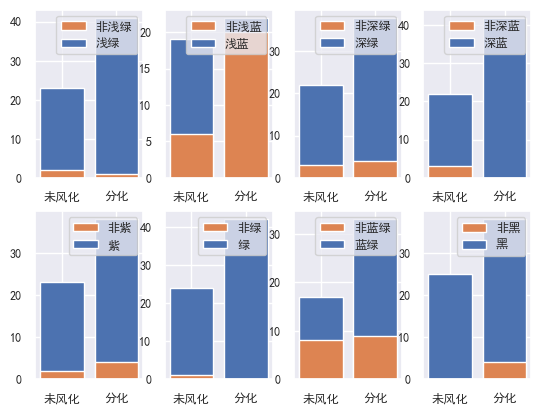

In [139]:
data3 = data[["颜色_浅绿","颜色_浅蓝","颜色_深绿","颜色_深蓝","颜色_紫","颜色_绿","颜色_蓝绿","颜色_黑","表面风化_风化"]]
table1 = pd.crosstab(data["颜色_浅绿"],data["表面风化_风化"],margins=True)
table2 = pd.crosstab(data["颜色_浅蓝"],data["表面风化_风化"],margins=True)
table3 = pd.crosstab(data["颜色_深绿"],data["表面风化_风化"],margins=True)
table4 = pd.crosstab(data["颜色_深蓝"],data["表面风化_风化"],margins=True)
table5 = pd.crosstab(data["颜色_紫"],data["表面风化_风化"],margins=True)
table6 = pd.crosstab(data["颜色_绿"],data["表面风化_风化"],margins=True)
table7 = pd.crosstab(data["颜色_蓝绿"],data["表面风化_风化"],margins=True)
table8 = pd.crosstab(data["颜色_黑"],data["表面风化_风化"],margins=True)

list1 = [table1,table2,table3,table4,table5,table6,table7,table8]

# 创建图像窗口
plt.figure()
# 创建子图
j=1
list2 = ["非浅绿","浅绿","非浅蓝","浅蓝","非深绿","深绿","非深蓝","深蓝","非紫","紫","非绿","绿","非蓝绿","蓝绿","非黑","黑"]
for i in list1:
    plt.subplot(2,4,j)
    sns.set(font_scale=0.8)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

    categories = ["未风化","分化"]
    count_n = i.iloc[0][0:2].values
    count_y = i.iloc[1][0:2].values
    p1 = plt.bar(categories,count_n)
    p2 = plt.bar(categories,count_y)
    plt.legend((p2[0],p1[0]),(list2[2*j-2],list2[2*j-1]))
    j+=1
# 展示图片  
plt.show()

In [140]:
from scipy import stats
j=1
for ob in list1:
    f_ob = np.array([ob.iloc[0][0:2].values,ob.iloc[1][0:2].values])
    print(list2[2*j-1],"p值",stats.chi2_contingency(f_ob))
    j+=1

浅绿 p值 (0.21610491071428584, 0.6420239438865225, 1, array([[23.88059701, 40.11940299],
       [ 1.11940299,  1.88059701]]))
浅蓝 p值 (2.7541202090592325, 0.09700416450588568, 1, array([[15.29850746, 25.70149254],
       [ 9.70149254, 16.29850746]]))
深绿 p值 (0.0, 1.0, 1, array([[22.3880597, 37.6119403],
       [ 2.6119403,  4.3880597]]))
深蓝 p值 (2.8435949900793656, 0.09173875598809793, 1, array([[23.88059701, 40.11940299],
       [ 1.11940299,  1.88059701]]))
紫 p值 (0.0, 1.0, 1, array([[22.76119403, 38.23880597],
       [ 2.23880597,  3.76119403]]))
绿 p值 (0.06985209235209233, 0.7915522551684074, 1, array([[24.62686567, 41.37313433],
       [ 0.37313433,  0.62686567]]))
蓝绿 p值 (0.450889355742297, 0.5019129158294906, 1, array([[18.65671642, 31.34328358],
       [ 6.34328358, 10.65671642]]))
黑 p值 (1.1197685185185184, 0.28996830334688095, 1, array([[23.50746269, 39.49253731],
       [ 1.49253731,  2.50746269]]))


下面我们进行相关性分析：使用spearman相关系数

In [141]:
df = pd.read_excel("1.1.xlsx")



In [142]:
df2 = df[["纹饰","类型","颜色","表面风化"]]
df2["纹饰"] = LabelEncoder().fit_transform(np.array(df2["纹饰"])).reshape(-1,1)
df2["表面风化"] = LabelEncoder().fit_transform(np.array(df2["表面风化"])).reshape(-1,1)
df2["类型"] = LabelEncoder().fit_transform(np.array(df2["类型"])).reshape(-1,1)
df2["颜色"] = LabelEncoder().fit_transform(np.array(df2["颜色"])).reshape(-1,1)

print(df2.corr('spearman'))

            纹饰        类型        颜色      表面风化
纹饰    1.000000 -0.134535 -0.223416  0.047862
类型   -0.134535  1.000000  0.412708 -0.316228
颜色   -0.223416  0.412708  1.000000  0.069605
表面风化  0.047862 -0.316228  0.069605  1.000000


C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2616648597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["纹饰"] = LabelEncoder().fit_transform(np.array(df2["纹饰"])).reshape(-1,1)
C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2616648597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["表面风化"] = LabelEncoder().fit_transform(np.array(df2["表面风化"])).reshape(-1,1)
C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2616648597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

<AxesSubplot:>

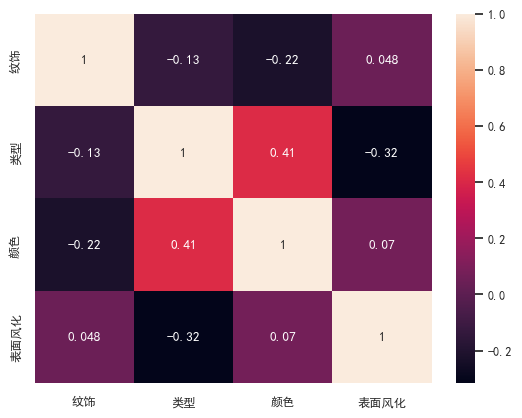

In [143]:
spearman_matrix = df2.corr('spearman')
sns.heatmap(spearman_matrix, annot=True)

此时我们已经可以看出类型所产生的影响是最大的，这与接下来我们继续讨论类型与分化是可以理解的

问题1.2：基于这些玻璃文物的类型，分析文物样品表面有无风化化学成分含量的统计规律；

In [144]:
data2=pd.read_excel('附件.xlsx',sheet_name='表单2')
data=pd.read_excel('附件.xlsx',sheet_name='表单1')

In [222]:
data2.describe()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),文物编号
count,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00
mean,49.38,0.84,1.98,2.46,0.69,3.97,0.85,1.93,23.76,7.55,2.61,0.25,0.08,0.59,30.04
std,24.05,1.66,3.91,2.33,0.64,3.06,1.16,2.21,19.66,8.40,3.52,0.27,0.33,2.66,17.22
min,3.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,29.15,0.00,0.00,0.68,0.00,1.85,0.00,0.55,1.00,0.00,0.17,0.00,0.00,0.00,15.00
50%,51.54,0.00,0.21,1.60,0.66,3.33,0.33,1.09,22.05,6.22,0.94,0.22,0.00,0.00,30.00
75%,65.18,0.92,0.74,3.51,1.14,5.38,1.33,2.99,40.24,10.29,4.24,0.41,0.00,0.00,45.00
max,96.77,7.92,14.52,8.70,2.73,14.34,6.04,10.57,70.21,35.45,14.13,1.12,2.36,15.95,58.00


In [145]:
data2.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36


In [146]:
data2['文物编号']=data2['文物采样点'].apply(lambda x:int(str(x)[:2]))

在缺失值处理时，使用众数填充数据集众数不唯一，如果直接使用mode()填充很可能导致填充失败，所以要再mode()后加上一个索引[0]。我们把原来要删去的颜色填充为众数，进行进一步分析

In [147]:
data['颜色'].fillna(data['颜色'].mode()[0],inplace=True)
data

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化
5,6,A,高钾,蓝绿,无风化
6,7,B,高钾,蓝绿,风化
7,8,C,铅钡,紫,风化
8,9,B,高钾,蓝绿,风化
9,10,B,高钾,蓝绿,风化


In [148]:
data2.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),文物编号
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39,1
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN,2
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN,3
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN,3
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36,4


In [149]:
data2.isnull().sum()

文物采样点           0
二氧化硅(SiO2)      0
氧化钠(Na2O)      50
氧化钾(K2O)       28
氧化钙(CaO)        8
氧化镁(MgO)       25
氧化铝(Al2O3)      1
氧化铁(Fe2O3)     24
氧化铜(CuO)        5
氧化铅(PbO)       11
氧化钡(BaO)       16
五氧化二磷(P2O5)    10
氧化锶(SrO)       23
氧化锡(SnO2)      62
二氧化硫(SO2)      61
文物编号            0
dtype: int64

In [150]:
data2.fillna(0,inplace=True) ## 填充空缺

In [151]:
data2.isnull().sum() ## 检查一遍

文物采样点          0
二氧化硅(SiO2)     0
氧化钠(Na2O)      0
氧化钾(K2O)       0
氧化钙(CaO)       0
氧化镁(MgO)       0
氧化铝(Al2O3)     0
氧化铁(Fe2O3)     0
氧化铜(CuO)       0
氧化铅(PbO)       0
氧化钡(BaO)       0
五氧化二磷(P2O5)    0
氧化锶(SrO)       0
氧化锡(SnO2)      0
二氧化硫(SO2)      0
文物编号           0
dtype: int64

In [152]:
# 为了防止02部位1,2的影响，我们将两个表merge一下
data_merge=pd.merge(data,data2,on="文物编号")
data_merge

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,高钾,蓝绿,无风化,01,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,2,A,铅钡,浅蓝,风化,02,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,3,A,高钾,蓝绿,无风化,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,3,A,高钾,蓝绿,无风化,03部位2,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,4,A,高钾,蓝绿,无风化,04,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54,C,铅钡,浅蓝,风化,54严重风化点,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
65,55,C,铅钡,绿,无风化,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
66,56,C,铅钡,蓝绿,风化,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
67,57,C,铅钡,蓝绿,风化,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00


In [153]:
## 将其保存到1.3
data_merge.to_excel('1.3.xlsx',index=None)

因为我们刚才在做相关分析的时候已经发现，类型对于文物的风化的影响是最大的，所以此处我们主要研究：
分类汇总

变量：
分组变量:{类型，表面风化}；汇总变量:{二氧化硅(SiO2)，氧化钠(Na2O)，氧化钾(K2O)，氧化钙(CaO)，氧化镁(MgO)，氧化铝(Al2O3)，氧化铁(Fe2O3)，氧化铜(CuO)，氧化铅(PbO)，氧化钡(BaO)，五氧化二磷(P2O5)，氧化锶(SrO)，氧化锡(SnO2)，二氧化硫(SO2)}

参数：
汇总类型:{均值，中位数，标准差，最大值，最小值}

In [154]:
data_merge.columns

Index(['文物编号', '纹饰', '类型', '颜色', '表面风化', '文物采样点', '二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)'],
      dtype='object')

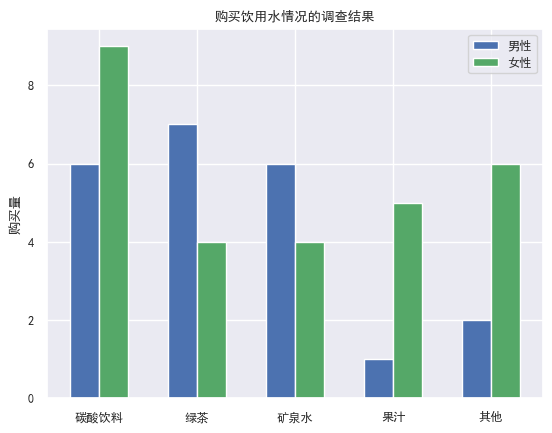

In [156]:
## 这个不是内容，只是一个作图的模板贴在这里了
import matplotlib.pyplot as plt
import numpy as np

# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 输入统计数据
waters = ('碳酸饮料', '绿茶', '矿泉水', '果汁', '其他')
buy_number_male = [6, 7, 6, 1, 2]
buy_number_female = [9, 4, 4, 5, 6]

bar_width = 0.3  # 条形宽度
index_male = np.arange(len(waters))  # 男生条形图的横坐标
index_female = index_male + bar_width  # 女生条形图的横坐标

# 使用两次 bar 函数画出两组条形图
plt.bar(index_male, height=buy_number_male, width=bar_width, color='b', label='男性')
plt.bar(index_female, height=buy_number_female, width=bar_width, color='g', label='女性')

plt.legend()  # 显示图例
plt.xticks(index_male + bar_width/2, waters)  # 让横坐标轴刻度显示 waters 里的饮用水， index_male + bar_width/2 为横坐标轴刻度的位置
plt.ylabel('购买量')  # 纵坐标轴标题
plt.title('购买饮用水情况的调查结果')  # 图形标题

plt.show()



这儿我想贴几张图，关于这些数据，总共5张:{均值，中位数，标准差，最大值，最小值}
先假装已经做了

In [159]:
# 现将85到105的数据清理掉
data_merge['sum']=0
for i in ['二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)']:
    data_merge['sum']+=data_merge[i]
    
data_merge=data_merge[(data_merge['sum']>85)&(data_merge['sum']<105)]
data_merge

C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2737156687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge['sum']=0
C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2737156687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge['sum']+=data_merge[i]


,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),...,氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum
0,1,C,高钾,蓝绿,无风化,01,69.33,0.00,9.99,6.32,...,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61
1,2,A,铅钡,浅蓝,风化,02,36.28,0.00,1.05,2.34,...,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89
2,3,A,高钾,蓝绿,无风化,03部位1,87.05,0.00,5.19,2.01,...,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00
3,3,A,高钾,蓝绿,无风化,03部位2,61.71,0.00,12.37,5.87,...,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88
4,4,A,高钾,蓝绿,无风化,04,65.88,0.00,9.67,7.12,...,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54,C,铅钡,浅蓝,风化,54严重风化点,17.11,0.00,0.00,0.00,...,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,96.92
65,55,C,铅钡,绿,无风化,55,49.01,2.71,0.00,1.13,...,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00,96.38
66,56,C,铅钡,蓝绿,风化,56,29.15,0.00,0.00,1.21,...,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,92.24
67,57,C,铅钡,蓝绿,风化,57,25.42,0.00,0.00,1.31,...,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00,92.47


In [163]:
data_merge.reset_index(inplace=True,drop=True)
# 重新设置索引index，方便后续观察
data_merge

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),...,氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum
0,1,C,高钾,蓝绿,无风化,01,69.33,0.00,9.99,6.32,...,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61
1,2,A,铅钡,浅蓝,风化,02,36.28,0.00,1.05,2.34,...,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89
2,3,A,高钾,蓝绿,无风化,03部位1,87.05,0.00,5.19,2.01,...,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00
3,3,A,高钾,蓝绿,无风化,03部位2,61.71,0.00,12.37,5.87,...,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88
4,4,A,高钾,蓝绿,无风化,04,65.88,0.00,9.67,7.12,...,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,54,C,铅钡,浅蓝,风化,54严重风化点,17.11,0.00,0.00,0.00,...,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,96.92
63,55,C,铅钡,绿,无风化,55,49.01,2.71,0.00,1.13,...,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00,96.38
64,56,C,铅钡,蓝绿,风化,56,29.15,0.00,0.00,1.21,...,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,92.24
65,57,C,铅钡,蓝绿,风化,57,25.42,0.00,0.00,1.31,...,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00,92.47


In [164]:
# 然后咋预测，没想好，先留个空

问题 2 依据附件数据分析高钾玻璃、铅钡玻璃的分类规律；对于每个类别选择合适的化学成分对其进行亚类划分，给出具体的划分方法及划分结果，并对分类结果的合理性和敏感性 
进行分析。 

分解问题：

问题（1）：分析高钾玻璃、铅钡玻璃的分类规律；

构建一个可解释的机器学习分类模型，例如决策树、逻辑回归，以类型(高钾玻璃、铅钡玻璃)为Y，尽可能构建足够多的特征X，形成可解释的分类规律：我想尝试一下随机森林？有点小难，先试一下kmeans
变量X:{二氧化硅(SiO2)，氧化钠(Na2O)，氧化钾(K2O)，氧化钙(CaO)，氧化镁(MgO)，氧化铝(Al2O3)，氧化铁(Fe2O3)，氧化铜(CuO)，氧化铅(PbO)，氧化钡(BaO)，五氧化二磷(P2O5)，氧化锶(SrO)，氧化锡(SnO2)，二氧化硫(SO2)}；变量Y:{类型}

问题（2）：对于每个类别选择合适的化学成分对其进行亚类划分，给出具体的划分方法及划分结果；

分别对类别进行聚类模型，得分点关键在于亚类划分的可解释性以及划分效果。

问题（3）：对分类结果的合理性和敏感性进行分析。

对分类结果的合理性应该是放在问题（2）里面的，直接用一些量化划分聚类效果的评价指标进行评估就ok了，这里重点在于对前面使用的模型参数进行调整，分析模型的敏感性

In [165]:
# 先试一下kmeans类：
KKK=data_merge[['类型','二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)']]
KKK.head()

,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,高钾,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,铅钡,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,高钾,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,高钾,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,高钾,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


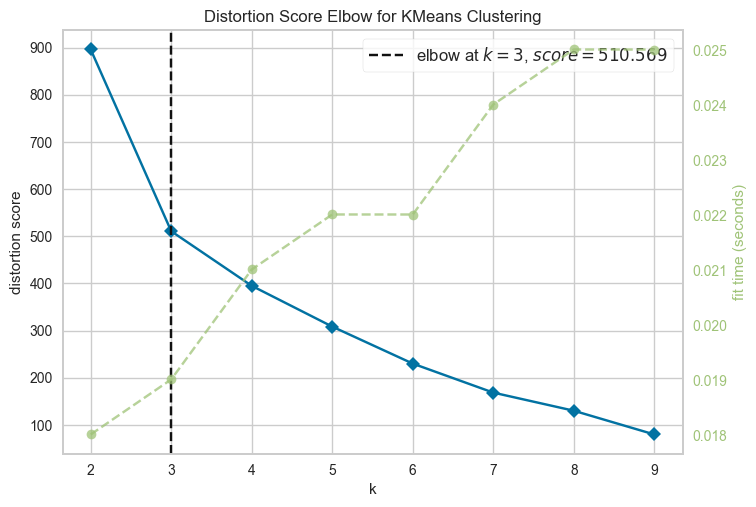

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [171]:
# 先分类一下高钾
KKK[KKK['类型']=='高钾']
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# 在机器学习的聚类问题上，聚类数目K值的选择其实是核心问题，一般采用的elbow method采取肘部那个点
Xk=KKK[KKK['类型']=='高钾']
Xk.reset_index(inplace=True,drop=True)
# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), Xk[Xk.columns[1:]], k=(2,10))

In [167]:
    Xk

,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,高钾,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
1,高钾,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
2,高钾,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
3,高钾,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36
4,高钾,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47
5,高钾,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00
6,高钾,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00
7,高钾,92.63,0.00,0.00,1.07,0.00,1.98,0.17,3.24,0.00,0.00,0.61,0.00,0.00,0.00
8,高钾,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00
9,高钾,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00


In [183]:
k_means = KMeans(n_clusters=3, random_state=42,n_init=1000)
# n_cluster 聚类的个数，random_state就是一个随机种子,n_init是做了1000次取最好那次
k_means.fit(Xk[Xk.columns[1:]])
# 我们对化学元素进行拟合
y_predict = k_means.predict(Xk[Xk.columns[1:]])
# 最终得到了predict数据
Xk['分类']=y_predict
Xk.head()

C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2102009214.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xk['分类']=y_predict


,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),分类
0,铅钡,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,0
1,铅钡,20.14,0.0,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.0,2.58,2
2,铅钡,4.61,0.0,0.00,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.0,15.03,2
3,铅钡,33.59,0.0,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.0,0.00,2
4,铅钡,29.64,0.0,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.0,0.00,0


In [177]:
Xk.to_excel('2.1.高钾.xlsx',index=None)

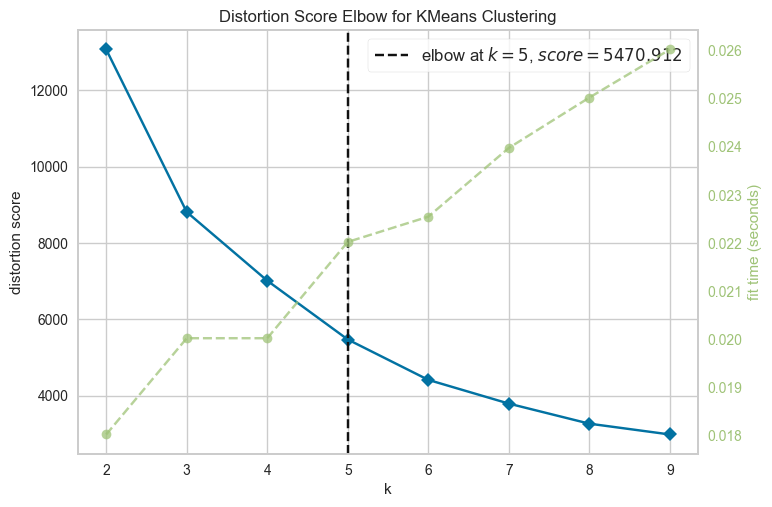

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [178]:
# 同理
Xk=KKK[KKK['类型']=='铅钡']
Xk.reset_index(inplace=True,drop=True)
# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), Xk[Xk.columns[1:]], k=(2,10))

In [186]:
k_means = KMeans(n_clusters=5, random_state=4,n_init=10000)

k_means.fit(Xk[Xk.columns[1:]])

y_predict = k_means.predict(Xk[Xk.columns[1:]])
Xk['分类']=y_predict
Xk.to_excel('2.1.铅钡.xlsx',index=None)
Xk.head()


C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\807084050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xk['分类']=y_predict


,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),分类
0,铅钡,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,4
1,铅钡,20.14,0.0,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.0,2.58,2
2,铅钡,4.61,0.0,0.00,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.0,15.03,2
3,铅钡,33.59,0.0,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.0,0.00,0
4,铅钡,29.64,0.0,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.0,0.00,4


问题 3 对附件表单 3 中未知类别玻璃文物的化学成分进行分析，鉴别其所属类型，并对分类结果的敏感性进行分析。 

问题（1）：对附件表单 3 中未知类别玻璃文物的化学成分进行分析，鉴别其所属类型；

基于问题2，预测表单3未知类别玻璃文物的类型，至于化学成分分析不分析不是重点

问题（2）：对分类结果的敏感性进行分析。 

如果我们采用的是机器学习模型，那么这一步就无需进行分析，机器学习只需要在训练时分析敏感性，预测时模型已经固定，无需进行敏感性分析，但是如果我们是通过推断的方式来进行分析的话，那么这里需要复现一下敏感性分析

In [187]:
data3=pd.read_excel('附件.xlsx',sheet_name='表单3')
data3.head()

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,78.45,NaN,NaN,6.08,1.86,7.23,2.15,2.11,NaN,NaN,1.06,0.03,NaN,0.51
1,A2,风化,37.75,NaN,NaN,7.63,NaN,2.33,NaN,NaN,34.30,NaN,14.27,NaN,NaN,NaN
2,A3,无风化,31.95,NaN,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,NaN,NaN
3,A4,无风化,35.47,NaN,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,NaN,NaN
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,NaN


In [188]:
data3.fillna(0,inplace=True)
data3

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51
1,A2,风化,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00
2,A3,无风化,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00
3,A4,无风化,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00
5,A6,风化,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.00,0.21,0.00,0.00,0.00
6,A7,风化,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.00,0.13,0.00,0.00,0.11
7,A8,无风化,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26


In [189]:
data3=pd.concat([data3,pd.get_dummies(data3['表面风化'])],axis=1)# get_dummies可以快速实现one-hot
data3

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),无风化,风化
0,A1,无风化,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51,1,0
1,A2,风化,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00,0,1
2,A3,无风化,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00,1,0
3,A4,无风化,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00,1,0
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00,0,1
5,A6,风化,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.00,0.21,0.00,0.00,0.00,0,1
6,A7,风化,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.00,0.13,0.00,0.00,0.11,0,1
7,A8,无风化,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26,1,0


In [195]:
data_merge=data_merge[['类型','表面风化','二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)']]
data_merge=pd.concat([data_merge,pd.get_dummies(data_merge['表面风化'])],axis=1)
data_merge.head()

,类型,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),无风化,风化
0,高钾,无风化,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,1,0
1,铅钡,风化,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,0,1
2,高钾,无风化,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,1,0
3,高钾,无风化,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,1,0
4,高钾,无风化,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,1,0


In [198]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.linear_model import LogisticRegression # 逻辑斯特回归
from sklearn.metrics import classification_report,f1_score 
from sklearn.model_selection import train_test_split # 用来分出测试集，训练集，检验集，0.6,0.2,0.2的比例最佳，但是在这里，我们已经有了测试集，所以就分成0.7:0.3的测试集和训练集即可

In [199]:
data_merge.columns

Index(['类型', '表面风化', '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)', '无风化',
       '风化'],
      dtype='object')

In [200]:
data_merge.to_excel('3.1data_merge.xlsx',index=None)

In [201]:
X=data_merge[['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)', '无风化',
       '风化']]

y=data_merge['类型']
# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [203]:
#逻辑 回归
model = LogisticRegression()

model.fit(x_train, y_train)
print('逻辑 回归')
print(classification_report(model.predict(x_test),y_test))

# Randomforest分类

model = RandomForestClassifier()

model.fit(x_train, y_train)
print('Randomforest分类')
print(classification_report(model.predict(x_test),y_test))

# lgbm分类
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)
print('lgbm分类')
print(classification_report(model.predict(x_test),y_test))


# # XGboost分类
# model = xgb.XGBClassifier()
# model.fit(x_train, y_train)
# print('XGboost分类')
# print(classification_report(model.predict(x_test),y_test))

逻辑 回归
              precision    recall  f1-score   support

          铅钡       1.00      1.00      1.00        17
          高钾       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Randomforest分类
              precision    recall  f1-score   support

          铅钡       1.00      1.00      1.00        17
          高钾       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

lgbm分类
              precision    recall  f1-score   support

          铅钡       1.00      1.00      1.00        17
          高钾       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00   

In [204]:
# 去随机森林为例
model = RandomForestClassifier()
model.fit(X, y)
model.predict(data3[['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)', '无风化',
       '风化']])

array(['高钾', '铅钡', '铅钡', '铅钡', '铅钡', '高钾', '高钾', '铅钡'], dtype=object)

In [205]:
#取消科学计数法
import  pandas as pd
import numpy as np
pd.set_option("display.float_format", lambda x: "%.2f" % x) #为了直观的显示数字，不采用科学计数法
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [206]:
%matplotlib inline
data_X=[]
data_y=[]
for i in range(1,1000,20):
    model = RandomForestClassifier(n_estimators=i,
    max_depth=None)
    model.fit(X, y)
    data_X.append(i)
    data_y.append(f1_score(y,model.predict(X), pos_label="高钾"))
    print(i)

1
21
41
61
81
101
121
141
161
181
201
221
241
261
281
301
321
341
361
381
401
421
441
461
481
501
521
541
561
581
601
621
641
661
681
701
721
741
761
781
801
821
841
861
881
901
921
941
961
981


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


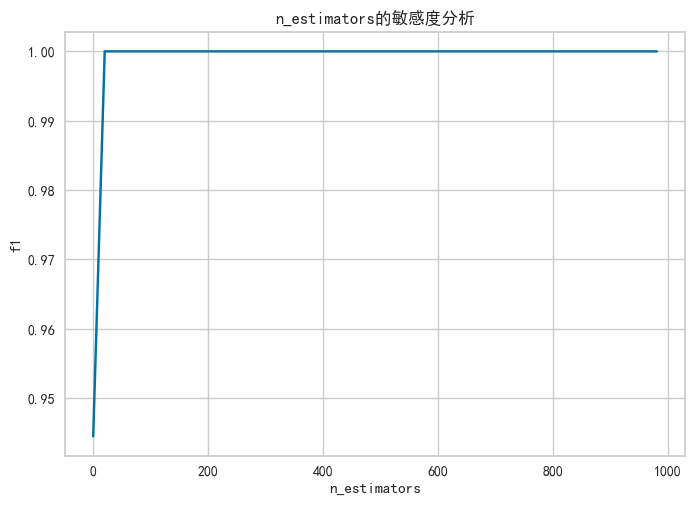

In [207]:
plt.plot(data_X,data_y)
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.title('n_estimators的敏感度分析')
plt.legend()
plt.savefig('n_estimators的敏感度分析.jpg')
plt.show()

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


47
49


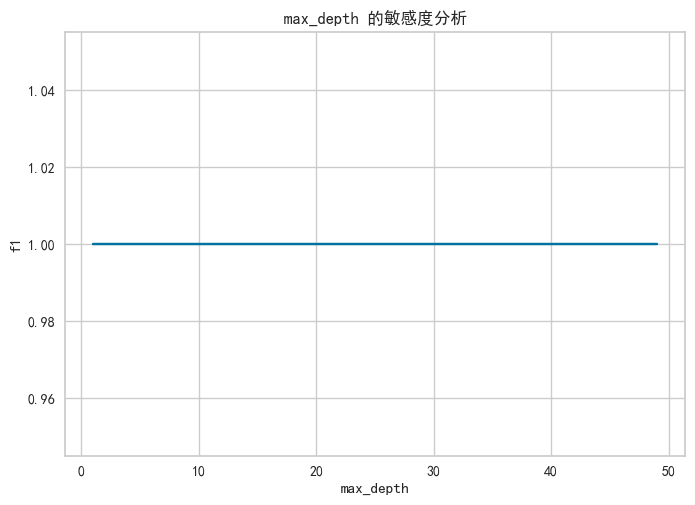

In [212]:
data_X=[]
data_y=[]
for i in range(1,50,2):
    model = RandomForestClassifier(n_estimators=50,max_depth=i)
    model.fit(X, y)
    data_X.append(i)
    data_y.append(f1_score(y,model.predict(X), pos_label="高钾"))
    print(i)
plt.plot(data_X,data_y)
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.title('max_depth 的敏感度分析')
plt.legend()
plt.savefig('max_depth 的敏感度分析.jpg')
plt.show()

问题 4 针对不同类别的玻璃文物样品，分析其化学成分之间的关联关系，并比较不同类别之间的化学成分关联关系的差异性。 

问题（1）：针对不同类别的玻璃文物样品，分析其化学成分之间的关联关系

与问题1的问题（2）类似，只是减少了一个条件——有无风化,相关性分析，差异分析

问题（2）：比较不同类别之间的化学成分关联关系的差异性。方差检验，卡方检验，和T检验选一种

与问题1的问题（2）类似

In [213]:
data_merge[['类型',  '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']].to_excel('4.xlsx',index=None)

In [217]:
## 相关性分析
df2 = data_merge[data_merge['类型']=='高钾']

print(df2.corr())

             二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
二氧化硅(SiO2)         1.00      -0.46     -0.88     -0.82     -0.60       -0.83   
氧化钠(Na2O)         -0.46       1.00      0.55      0.62     -0.24        0.34   
氧化钾(K2O)          -0.88       0.55      1.00      0.76      0.39        0.59   
氧化钙(CaO)          -0.82       0.62      0.76      1.00      0.21        0.54   
氧化镁(MgO)          -0.60      -0.24      0.39      0.21      1.00        0.70   
氧化铝(Al2O3)        -0.83       0.34      0.59      0.54      0.70        1.00   
氧化铁(Fe2O3)        -0.69      -0.02      0.34      0.46      0.59        0.69   
氧化铜(CuO)          -0.47      -0.02      0.25      0.42      0.14        0.21   
氧化铅(PbO)          -0.40       0.36      0.28      0.37      0.17        0.42   
氧化钡(BaO)          -0.34      -0.21      0.09      0.08      0.43        0.38   
五氧化二磷(P2O5)       -0.45      -0.19      0.17     -0.03      0.65        0.68   
氧化锶(SrO)          -0.53      -0.18      

<AxesSubplot:>

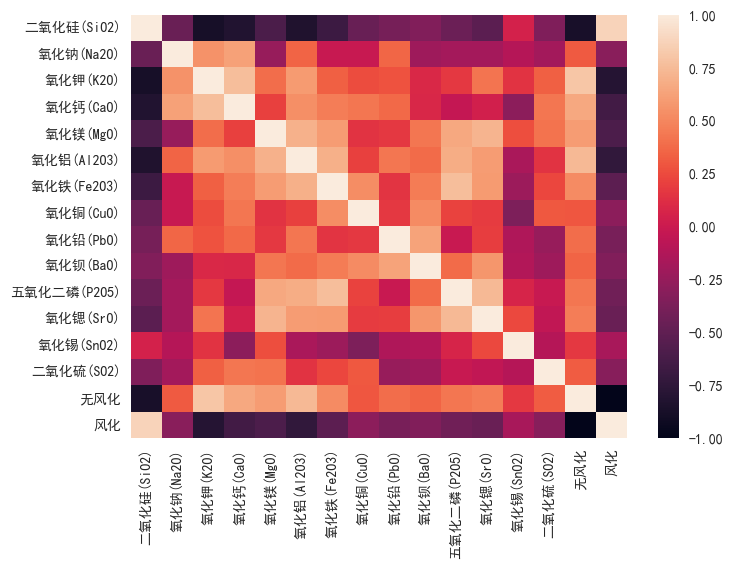

In [219]:
spearman_matrix = df2.corr()
sns.heatmap(spearman_matrix)

             二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
二氧化硅(SiO2)         1.00      -0.46     -0.88     -0.82     -0.60       -0.83   
氧化钠(Na2O)         -0.46       1.00      0.55      0.62     -0.24        0.34   
氧化钾(K2O)          -0.88       0.55      1.00      0.76      0.39        0.59   
氧化钙(CaO)          -0.82       0.62      0.76      1.00      0.21        0.54   
氧化镁(MgO)          -0.60      -0.24      0.39      0.21      1.00        0.70   
氧化铝(Al2O3)        -0.83       0.34      0.59      0.54      0.70        1.00   
氧化铁(Fe2O3)        -0.69      -0.02      0.34      0.46      0.59        0.69   
氧化铜(CuO)          -0.47      -0.02      0.25      0.42      0.14        0.21   
氧化铅(PbO)          -0.40       0.36      0.28      0.37      0.17        0.42   
氧化钡(BaO)          -0.34      -0.21      0.09      0.08      0.43        0.38   
五氧化二磷(P2O5)       -0.45      -0.19      0.17     -0.03      0.65        0.68   
氧化锶(SrO)          -0.53      -0.18      

<AxesSubplot:>

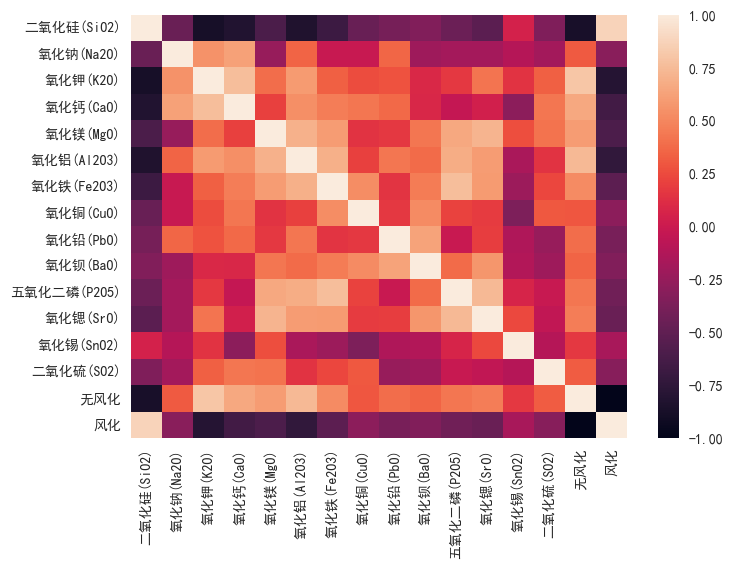

In [220]:
## 相关性分析
df2 = data_merge[data_merge['类型']=='高钾']

print(df2.corr())
spearman_matrix = df2.corr()
sns.heatmap(spearman_matrix)

In [226]:
## 差异性分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = pd.read_excel('4.xlsx')
data = pd.DataFrame(data)
data.head()


,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,高钾,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
1,铅钡,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.00,0.00
2,高钾,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
3,高钾,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
4,高钾,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36


In [228]:
df2 = data_merge[data_merge['类型']=='高钾']
df2.describe()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),无风化,风化
count,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00
mean,76.64,0.46,6.40,3.85,0.78,5.06,1.38,2.16,0.27,0.40,1.03,0.03,0.13,0.07,0.67,0.33
std,14.47,1.09,5.31,3.31,0.71,3.08,1.57,1.49,0.51,0.84,1.28,0.04,0.56,0.16,0.49,0.49
min,59.01,0.00,0.00,0.00,0.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,63.15,0.00,0.79,0.77,0.00,2.64,0.27,0.90,0.00,0.00,0.24,0.00,0.00,0.00,0.00,0.00
50%,73.00,0.00,7.53,3.36,0.65,4.78,0.46,1.92,0.00,0.00,0.68,0.00,0.00,0.00,1.00,0.00
75%,92.56,0.00,10.71,6.92,1.45,6.38,2.32,3.26,0.24,0.00,1.15,0.06,0.00,0.00,1.00,1.00
max,96.77,3.38,14.52,8.70,1.98,11.15,6.04,5.09,1.62,2.86,4.50,0.12,2.36,0.47,1.00,1.00


<AxesSubplot:xlabel='二氧化硅(SiO2)', ylabel='风化'>

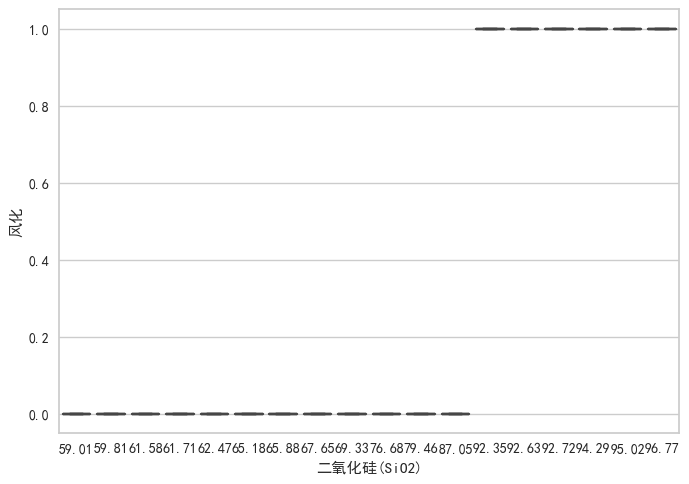

In [237]:
sns.boxplot(x = '二氧化硅(SiO2)',y='风化',data = df2)



In [239]:
data.head()

,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,高钾,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
1,铅钡,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.00,0.00
2,高钾,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
3,高钾,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
4,高钾,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36


<AxesSubplot:>

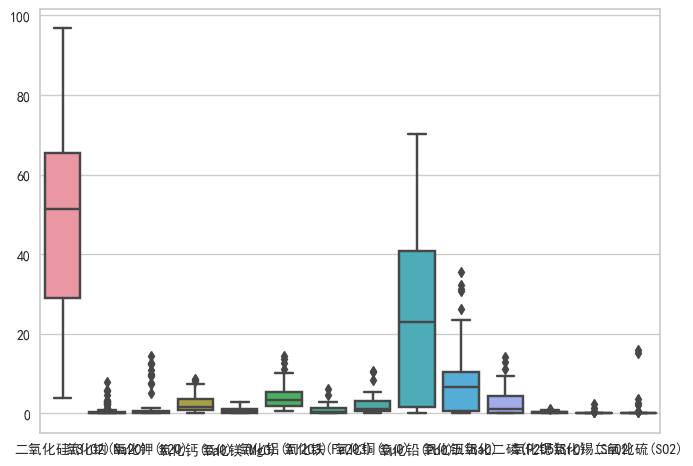

In [238]:
sns.boxplot(data = data)